#Meta Prompting
Meta prompting is an advanced technique in prompt engineering that emphasizes the structural and syntactical organization of tasks and problems rather than focusing on their specific content. The objective is to create a more abstract, form-driven way of engaging with large language models (LLMs), highlighting patterns and structure over traditional content-focused methods.

As outlined by [Zhang et al. (2024)](https://arxiv.org/abs/2311.11482), the defining features of meta prompting include:

Structure-Oriented: Prioritizes the organization and pattern of problems and solutions instead of specific content.
Syntax-Guided: Leverages syntax as a template to shape the expected responses or solutions.
Abstract Frameworks: Uses abstract examples as blueprints, demonstrating the structure of tasks without relying on concrete details.
Domain Versatility: Can be applied across multiple fields, offering structured solutions to diverse problem types.
Categorical Approach: Draws on type theory to organize and categorize components logically, enhancing prompt coherence and precision.

In [1]:
import json
from _pipeline import create_payload, model_req

# Define the Use Case Description
USE_CASE_DESCRIPTION = """
We seek to develop a solution SQL_Guardian, aligned with the Use Case for AI-Powered SQL Learning & Interview Preparation.

Our solution aims to provide an interactive learning experience for SQL, guiding users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.

The solution will work as follows:

1. **Interactive SQL Learning**: Users can ask SQL-related questions, receive detailed explanations, and see real-world examples.
2. **Real-time Query Execution**: The bot provides a built-in SQL execution environment where users can test their queries and receive instant feedback.
3. **Automated Query Evaluation**: The bot analyzes user queries, suggests optimizations, and explains execution plans.
4. **Interview Preparation Mode**: Offers FAANG-style SQL coding challenges with real-time evaluation and feedback.
5. **Personalized Learning Paths**: Tracks user progress and adapts question difficulty based on performance.
"""

# --------------------------------------------
# Step 1: Generate an Optimized CoT Prompt Strategy (Meta-Prompting)
# --------------------------------------------

meta_prompt_generation = f"""
You are an AI prompt engineering assistant specializing in automated requirement analysis.

### **Task:**  
Your goal is to **create an optimized Chain of Thought (CoT) prompting strategy** to extract a **comprehensive requirement analysis** for any project.

### **Instructions:**  
1. **Understand the Project Scope:**  
   - Identify the **core objectives** and **functionalities**.  
   - Determine if **AI, real-time processing, or security features** are required.  

2. **Generate a CoT Prompt Strategy:**  
   - Ensure the prompt strategy includes:  
     - **Functional Requirements** (system operations, automation, and AI capabilities).  
     - **Non-Functional Requirements** (performance, security, compliance, usability).  
     - **Constraints & Edge Cases** (scalability, concurrency, query handling).  
     - **Technical Requirements** (system architecture, APIs, cloud deployment, CI/CD).  

3. **Evaluate the CoT Strategy for Completeness:**  
   - Does it cover all key aspects of a proper requirement analysis?  
   - Will it adapt well to various project types?  
   - Does it include self-optimization steps for refining the results?  

---
#### **Use Case Description:**
{USE_CASE_DESCRIPTION}

---
Now, generate an **optimized Chain of Thought (CoT) prompt strategy** that ensures a **complete and adaptive requirement analysis** for this project.
"""

# Send request to model to generate the CoT Prompt Strategy
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=meta_prompt_generation,
                         temperature=0.3,  
                         num_ctx=700,
                         num_predict=1800)

time, cot_strategy_response = model_req(payload=payload)

time1=time

# --------------------------------------------
# Step 2: Generate a Requirement Analysis Using the CoT Strategy
# --------------------------------------------

requirement_analysis_prompt = f"""
You are an expert in system design and requirement analysis.

The following is an **optimized Chain of Thought (CoT) prompt strategy** generated by another AI to guide requirement extraction.

---
### **AI-Generated CoT Prompt Strategy:**
{cot_strategy_response}

---
### **Task:**  
Now, based on this **AI-created CoT strategy**, generate a **comprehensive requirement analysis** by listing:

1. **Functional Requirements**  
2. **Non-Functional Requirements**  
3. **Constraints and Edge Cases**  
4. **Technical Requirements**  
5. **APIs and System Integration Considerations**  

Ensure the requirement analysis is **detailed, well-structured, and highly relevant** to the given project.
"""

# Send request to model to generate requirement analysis
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=requirement_analysis_prompt,
                         temperature=0.3,  
                         num_ctx=800,
                         num_predict=2000)

time, initial_response = model_req(payload=payload)

time2=time

# --------------------------------------------
# Step 3: AI Self-Evaluation & Refinement
# --------------------------------------------

self_evaluation_prompt = f"""
You are an AI specializing in **requirement analysis quality assessment**.

The following is a **generated requirement analysis**.

---
### **Initial Requirement Analysis Draft:**
{initial_response}

---
### **Task:**  
Your goal is to **evaluate and refine this requirement analysis** based on the following criteria:

1. **Completeness:** Does it cover all functional, non-functional, constraint, and technical aspects?  
2. **Depth:** Are explanations and system details sufficiently detailed?  
3. **Clarity:** Is the requirement analysis structured well and easy to understand?  
4. **Optimization:** Can any sections be **improved, refined, or expanded**?  

---
Now, generate an **improved and optimized version** of the requirement analysis by enhancing clarity, completeness, and depth.
"""

# Send request for self-refinement
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=self_evaluation_prompt,
                         temperature=0.3,  
                         num_ctx=1000,
                         num_predict=2500)

time, final_response = model_req(payload=payload)

time=time1+time2+time

# Print final improved response

time_values=[]

time_values.append(time)

print(final_response)
print(f'Time taken: {time}s')


### Improved and Optimized Requirement Analysis Draft:

---

#### Functional Requirements

1. **Interactive Learning Experience**
	* Provide a comprehensive learning experience with interactive lessons, quizzes, and exercises to help users learn and practice SQL skills.
	* Include real-time feedback on user performance to identify areas for improvement.
2. **Real-time Query Execution and Feedback**
	* Implement a query execution engine that can handle multiple queries simultaneously without significant performance degradation.
	* Provide instant feedback on query results, including syntax errors, incorrect data types, and optimization suggestions.
3. **Automated Query Evaluation and Optimization Suggestions**
	* Develop an algorithm to evaluate query performance and provide optimization suggestions based on user behavior and system metrics.
	* Consider using machine learning techniques to improve the accuracy of optimization suggestions over time.
4. **User Profile Management**
	* Impl

In [2]:
# Send request for self-refinement
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=self_evaluation_prompt,
                         temperature=0.7,  
                         num_ctx=1000,
                         num_predict=2000)

time, final_response = model_req(payload=payload)

time=time1+time2+time
# Print final improved response

time_values.append(time)

print(final_response)
print(f'Time taken: {time}s')


### Improved and Optimized Requirement Analysis Draft:

---

#### Functional Requirements

1. **Interactive Learning Experience**
	* Provide a comprehensive learning pathway with interactive lessons, quizzes, and exercises to teach SQL fundamentals.
	* Offer real-time feedback on user performance to help identify areas for improvement.
	* Include gamification elements to enhance engagement and motivation.

2. **Real-time Query Execution and Feedback**
	* Implement a robust query execution engine that can handle large datasets and complex queries.
	* Provide instant feedback on query results, including explanations of SQL syntax and optimization suggestions.
	* Offer real-time analytics to help users track their progress and identify trends in their query performance.

3. **Automated Query Evaluation and Optimization Suggestions**
	* Develop an intelligent query optimizer that can suggest improvements to optimize query performance.
	* Incorporate machine learning algorithms to analyze u

In [3]:
# Send request for self-refinement
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=self_evaluation_prompt,
                         temperature=1.0,  
                         num_ctx=1000,
                         num_predict=2000)

time, final_response = model_req(payload=payload)

time=time1+time2+time

time_values.append(time)

# Print final improved response

print(final_response)
print(f'Time taken: {time}s')


**Improved and Optimized Requirement Analysis for SQL_Guardian**

---

### **Functional Requirements**

#### 1. Interactive Learning Experience

* Provide a structured learning path with progressively increasing difficulty levels
* Include interactive exercises, quizzes, and challenges to reinforce user understanding
* Allow users to track their progress and identify areas for improvement
* Implement gamification elements (e.g., points, badges) to motivate users and encourage friendly competition
* Develop a comprehensive documentation center with video tutorials, live chat support, and FAQs

#### 2. Real-time Query Execution and Feedback

* Utilize a just-in-time compilation approach to optimize query execution performance
* Offer immediate feedback on query syntax errors and provide suggestions for improvement
* Implement a query logging mechanism to track user behavior and performance metrics
* Develop a customizable dashboard for users to monitor their progress and identify areas f

In [4]:
time_values

[86.92, 90.06, 85.982]

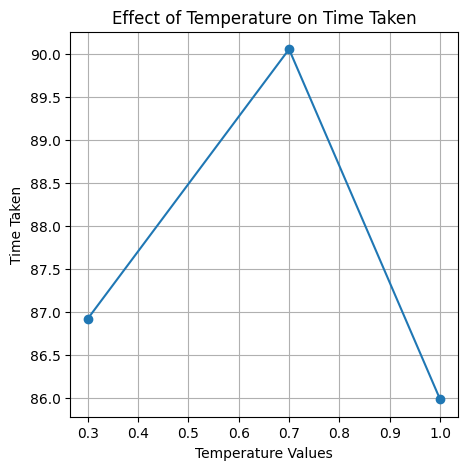

In [5]:
import matplotlib.pyplot as plt
temp_values=[0.3,0.7,1.0]
plt.figure(figsize=(5, 5))  # Use figsize instead of separate parameters
plt.plot(temp_values, time_values, marker='o', linestyle='-')  # Added markers for clarity
plt.xlabel("Temperature Values")
plt.ylabel("Time Taken")
plt.title("Effect of Temperature on Time Taken")
plt.grid(True)
plt.show()